### Навигация по проекту:

1. [Открытие и изучение данных](#start)
2. [Предобработка данных](#preprocessing)
3. [Анализ данных](#analysis)
4. [Проверка гипотез](#hypotheses)   
5. [Заключение](#conclusion)

### Шаг 0. Подключение библиотек

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

### Шаг 1. Открытие и изучение данных. <a id="start"></a> 

* Сперва загрузим файл и отобразим 5 строк

In [8]:
users = pd.read_csv('users.csv', parse_dates = ['churn_date','reg_date'])
calls = pd.read_csv('calls.csv', parse_dates = ['call_date'])
messages = pd.read_csv('messages.csv', parse_dates = ['message_date'])
internet = pd.read_csv('internet.csv', parse_dates = ['session_date'], index_col=0)
tariffs = pd.read_csv('tariffs.csv')

dts = {'users':users, 'calls':calls, 'messages':messages, 'internet':internet, 'tariffs':tariffs}
for name, dataset in dts.items():
    display('Dataset: ', name)
    display(dataset.head())
    display()

'Dataset: '

'users'

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


'Dataset: '

'calls'

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


'Dataset: '

'messages'

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


'Dataset: '

'internet'

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


'Dataset: '

'tariffs'

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


* Изучим столбцы и их типы

In [9]:
for name, dataset in dts.items():
    display('Dataset: ', name)
    display(dataset.info())
    display()
    display()

'Dataset: '

'users'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     datetime64[ns]
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


None

'Dataset: '

'calls'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64       
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


None

'Dataset: '

'messages'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


None

'Dataset: '

'internet'

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            149396 non-null  object        
 1   mb_used       149396 non-null  float64       
 2   session_date  149396 non-null  datetime64[ns]
 3   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 5.7+ MB


None

'Dataset: '

'tariffs'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


None

* Проверим скрытые пропуски

In [10]:
def nan_values(df,list_nans=['', ' ', '""', '" "', None, np.nan]):
    
    list_count=[]
    list_share=[]    
    
    for col in df.columns:
        list_count.append(sum(df[col].isin(list_nans)))
        list_share.append(round(sum(df[col].isin(list_nans)) * 100 / len(df), 2))
    
        
    missing_value_df = pd.DataFrame({'column_name': df.columns,
                                     'num_missing': list_count,
                                     'percent_missing': list_share})
    
    return missing_value_df

In [5]:
for name, dataset in dts.items():
    display('Dataset: ', name)
    display(nan_values(dataset))
    display()
    display()

'Dataset: '

'users'

,column_name,num_missing,percent_missing
0,user_id,0,0.0
1,age,0,0.0
2,churn_date,0,0.0
3,city,0,0.0
4,first_name,0,0.0
5,last_name,0,0.0
6,reg_date,0,0.0
7,tariff,0,0.0


'Dataset: '

'calls'

,column_name,num_missing,percent_missing
0,id,0,0.0
1,call_date,0,0.0
2,duration,0,0.0
3,user_id,0,0.0


'Dataset: '

'messages'

,column_name,num_missing,percent_missing
0,id,0,0.0
1,message_date,0,0.0
2,user_id,0,0.0


'Dataset: '

'internet'

,column_name,num_missing,percent_missing
0,id,0,0.0
1,mb_used,0,0.0
2,session_date,0,0.0
3,user_id,0,0.0


'Dataset: '

'tariffs'

,column_name,num_missing,percent_missing
0,messages_included,0,0.0
1,mb_per_month_included,0,0.0
2,minutes_included,0,0.0
3,rub_monthly_fee,0,0.0
4,rub_per_gb,0,0.0
5,rub_per_message,0,0.0
6,rub_per_minute,0,0.0
7,tariff_name,0,0.0


Скрытых пропусков тоже не обнаружено. 
* Смотрим общее описание.

In [11]:
for name, dataset in dts.items():
    display('Dataset: ', name)
    display(dataset.describe())
    display()
    display()

'Dataset: '

'users'

,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


'Dataset: '

'calls'

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


'Dataset: '

'messages'

,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


'Dataset: '

'internet'

,mb_used,user_id
count,149396.000000,149396.000000
mean,370.192426,1252.099842
std,278.300951,144.050823
min,0.000000,1000.000000
25%,138.187500,1130.000000
50%,348.015000,1251.000000
75%,559.552500,1380.000000
max,1724.830000,1499.000000


'Dataset: '

'tariffs'

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
std,671.751442,10861.160159,1767.766953,989.949494,35.355339,1.414214,1.414214
min,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000
25%,287.500000,19200.000000,1125.000000,900.000000,162.500000,1.500000,1.500000
50%,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
75%,762.500000,26880.000000,2375.000000,1600.000000,187.500000,2.500000,2.500000
max,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000


Вывод:

Пропусков в данных нет (пропуск по 'churn_date' значит, что пользователь не прерывал контракт), информацию по пользователям можно агрегировать по user_id. 

### Шаг 2. Предобработка данных <a id="preprocessing"></a> 

•	Приведение данных к нужным типам

С типами данных ознакомились на этапе получения общей информации. При чтении датасетов сразу парсировали данные, содержащие даты. Нареканий нет.

•	Поиск ошибок в данных, если они есть.

In [12]:
#смотрим дубликаты:

for name, dataset in dts.items():
    display('Dataset: ', name)
    display('Количество обнаруженных дубликатов:', dataset.duplicated().sum())
    display()
    display()

'Dataset: '

'users'

'Количество обнаруженных дубликатов:'

0

'Dataset: '

'calls'

'Количество обнаруженных дубликатов:'

0

'Dataset: '

'messages'

'Количество обнаруженных дубликатов:'

0

'Dataset: '

'internet'

'Количество обнаруженных дубликатов:'

0

'Dataset: '

'tariffs'

'Количество обнаруженных дубликатов:'

0

In [13]:
#уникальные значения в названиях городов (поиск скрытых дубликатов и ошибок)

users['city'].sort_values().unique()

array(['Архангельск', 'Астрахань', 'Балашиха', 'Барнаул', 'Белгород',
       'Брянск', 'Владивосток', 'Владикавказ', 'Владимир', 'Волгоград',
       'Волжский', 'Вологда', 'Воронеж', 'Грозный', 'Екатеринбург',
       'Иваново', 'Ижевск', 'Иркутск', 'Казань', 'Калининград', 'Калуга',
       'Кемерово', 'Киров', 'Кострома', 'Краснодар', 'Красноярск',
       'Курган', 'Курск', 'Липецк', 'Магнитогорск', 'Махачкала', 'Москва',
       'Мурманск', 'Набережные Челны', 'Нижневартовск', 'Нижний Новгород',
       'Нижний Тагил', 'Новокузнецк', 'Новороссийск', 'Новосибирск',
       'Омск', 'Оренбург', 'Орёл', 'Пенза', 'Пермь', 'Петрозаводск',
       'Подольск', 'Ростов-на-Дону', 'Рязань', 'Самара',
       'Санкт-Петербург', 'Саранск', 'Саратов', 'Севастополь', 'Смоленск',
       'Сочи', 'Ставрополь', 'Стерлитамак', 'Сургут', 'Тамбов', 'Тверь',
       'Тольятти', 'Томск', 'Тула', 'Тюмень', 'Улан-Удэ', 'Ульяновск',
       'Уфа', 'Хабаровск', 'Химки', 'Чебоксары', 'Челябинск', 'Череповец',
       'Чи

Ошибок нет. 

Далее необходимо:

Посчитать для каждого пользователя:


•	количество сделанных звонков и израсходованных минут разговора по месяцам;

•	количество отправленных сообщений по месяцам;

•	объем израсходованного интернет-трафика по месяцам;

•	помесячную выручку с каждого пользователя (вычесть бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножить на значение из тарифного плана; прибавить абонентскую плату, соответствующую тарифному плану).


In [14]:
#Округлим минуты звонков в бо́льшую сторону:

calls['duration'] = np.ceil(calls['duration']).astype(int)
calls['duration']

0          0
1          0
2          3
3         14
4          6
          ..
202602     1
202603    19
202604    11
202605     5
202606    20
Name: duration, Length: 202607, dtype: int32

In [15]:
#Выведем месяцы в отдельный столбец

calls['month'] = calls['call_date'].astype('datetime64[M]') 
calls.head()

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0,1000,2018-07-01
1,1000_1,2018-08-17,0,1000,2018-08-01
2,1000_2,2018-06-11,3,1000,2018-06-01
3,1000_3,2018-09-21,14,1000,2018-09-01
4,1000_4,2018-12-15,6,1000,2018-12-01


In [16]:
#Посчитаем количество и продолжительность звонков,
#результат сохраним в calls accounting, сокращенно calls_acc:

calls_acc = calls.pivot_table(index=['user_id','month'], values='duration', aggfunc=['count', 'sum'])
calls_acc.columns = ['calls_count', 'calls_duration']
calls_acc = calls_acc.fillna(0).astype(int).reset_index()
calls_acc.head(15)

,user_id,month,calls_count,calls_duration
0,1000,2018-05-01,22,159
1,1000,2018-06-01,43,172
2,1000,2018-07-01,47,340
3,1000,2018-08-01,52,408
4,1000,2018-09-01,58,466
5,1000,2018-10-01,57,350
6,1000,2018-11-01,43,338
7,1000,2018-12-01,46,333
8,1001,2018-11-01,59,430
9,1001,2018-12-01,63,414


То же проделаем для сообщений:

In [17]:
messages['month'] = messages['message_date'].astype('datetime64[M]') 
messages_acc = messages.pivot_table(index=['user_id', 'month'], values='message_date', aggfunc='count')
messages_acc.columns = ['messages_count']
messages_acc = messages_acc.fillna(0).astype(int).reset_index()
messages_acc.head(15)

,user_id,month,messages_count
0,1000,2018-05-01,22
1,1000,2018-06-01,60
2,1000,2018-07-01,75
3,1000,2018-08-01,81
4,1000,2018-09-01,57
5,1000,2018-10-01,73
6,1000,2018-11-01,58
7,1000,2018-12-01,70
8,1002,2018-06-01,4
9,1002,2018-07-01,11


И для израсходованного интернет-трафика:

In [18]:
internet['month'] = internet['session_date'].astype('datetime64[M]') 
internet_acc = internet.pivot_table(index=['user_id','month'], values='mb_used', aggfunc='sum')
internet_acc.columns = ['mb_traffic_count']
internet_acc = internet_acc.fillna(0).astype(int).reset_index()
internet_acc.head(15)

,user_id,month,mb_traffic_count
0,1000,2018-05-01,2253
1,1000,2018-06-01,23233
2,1000,2018-07-01,14003
3,1000,2018-08-01,14055
4,1000,2018-09-01,14568
5,1000,2018-10-01,14702
6,1000,2018-11-01,14756
7,1000,2018-12-01,9817
8,1001,2018-11-01,18429
9,1001,2018-12-01,14036


Теперь склеим все таблицы:

In [19]:
data1 = calls_acc.merge(messages_acc, on=['user_id', 'month'], how='outer')
data_pivot = data1.merge(internet_acc, on=['user_id', 'month'], how='outer')
# data_pivot = data_pivot.fillna(0).astype(int)
data_pivot.head(15)                                     #большая сводная таблица звонков, сообщений и израсходованного траффика   

,user_id,month,calls_count,calls_duration,messages_count,mb_traffic_count
0,1000,2018-05-01,22.0,159.0,22.0,2253.0
1,1000,2018-06-01,43.0,172.0,60.0,23233.0
2,1000,2018-07-01,47.0,340.0,75.0,14003.0
3,1000,2018-08-01,52.0,408.0,81.0,14055.0
4,1000,2018-09-01,58.0,466.0,57.0,14568.0
5,1000,2018-10-01,57.0,350.0,73.0,14702.0
6,1000,2018-11-01,43.0,338.0,58.0,14756.0
7,1000,2018-12-01,46.0,333.0,70.0,9817.0
8,1001,2018-11-01,59.0,430.0,NaN,18429.0
9,1001,2018-12-01,63.0,414.0,NaN,14036.0


In [20]:
#Чтобы можно было склеить большую сводную с таблицами пользователей и тарифов, приведем наименования столбцов к одному общему:

tariffs.rename(columns={'tariff_name': 'tariff'}, inplace=True)

In [21]:
# Окончательное склеивание

data2 = data_pivot.merge(users, on='user_id', how='left')
united_data = data2.merge(tariffs, on='tariff', how='left')
united_data.head(15)

,user_id,month,calls_count,calls_duration,messages_count,mb_traffic_count,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,2018-05-01,22.0,159.0,22.0,2253.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,2018-06-01,43.0,172.0,60.0,23233.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,2018-07-01,47.0,340.0,75.0,14003.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,2018-08-01,52.0,408.0,81.0,14055.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,2018-09-01,58.0,466.0,57.0,14568.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
5,1000,2018-10-01,57.0,350.0,73.0,14702.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
6,1000,2018-11-01,43.0,338.0,58.0,14756.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
7,1000,2018-12-01,46.0,333.0,70.0,9817.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
8,1001,2018-11-01,59.0,430.0,NaN,18429.0,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,50,15360,500,550,200,3,3
9,1001,2018-12-01,63.0,414.0,NaN,14036.0,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,50,15360,500,550,200,3,3


* Считаем прибыль компании:

In [24]:
united_data['revenue_by_calls']=0  
united_data.loc[united_data['calls_duration']>united_data['minutes_included'], 'revenue_by_calls']= \
    (united_data['calls_duration'] - united_data['minutes_included'])* united_data['rub_per_minute']

united_data['revenue_by_msg']=0  
united_data.loc[united_data['messages_count']>united_data['messages_included'], 'revenue_by_msg']= \
    (united_data['messages_count'] - united_data['messages_included'])* united_data['rub_per_message']

united_data['revenue_by_gb']=0  
united_data.loc[united_data['mb_traffic_count']>united_data['mb_per_month_included'], 'revenue_by_gb']= \
    ((united_data['mb_traffic_count'] - united_data['mb_per_month_included'])/1024).apply(np.ceil)  #округляем до гб
united_data['revenue_by_gb'] = united_data['revenue_by_gb']* united_data['rub_per_gb']

united_data['revenue'] = united_data[['rub_monthly_fee','revenue_by_calls','revenue_by_msg','revenue_by_gb']].sum(axis=1)

united_data.head(15).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
user_id,1000,1000,1000,1000,1000,1000,1000,1000,1001,1001,1002,1002,1002,1002,1002
month,2018-05-01 00:00:00,2018-06-01 00:00:00,2018-07-01 00:00:00,2018-08-01 00:00:00,2018-09-01 00:00:00,2018-10-01 00:00:00,2018-11-01 00:00:00,2018-12-01 00:00:00,2018-11-01 00:00:00,2018-12-01 00:00:00,2018-06-01 00:00:00,2018-07-01 00:00:00,2018-08-01 00:00:00,2018-09-01 00:00:00,2018-10-01 00:00:00
calls_count,22.0,43.0,47.0,52.0,58.0,57.0,43.0,46.0,59.0,63.0,15.0,26.0,42.0,36.0,33.0
calls_duration,159.0,172.0,340.0,408.0,466.0,350.0,338.0,333.0,430.0,414.0,117.0,214.0,289.0,206.0,212.0
messages_count,22.0,60.0,75.0,81.0,57.0,73.0,58.0,70.0,NaN,NaN,4.0,11.0,13.0,4.0,10.0
mb_traffic_count,2253.0,23233.0,14003.0,14055.0,14568.0,14702.0,14756.0,9817.0,18429.0,14036.0,10856.0,17580.0,20319.0,16691.0,13888.0
age,52,52,52,52,52,52,52,52,41,41,59,59,59,59,59
churn_date,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
city,Краснодар,Краснодар,Краснодар,Краснодар,Краснодар,Краснодар,Краснодар,Краснодар,Москва,Москва,Стерлитамак,Стерлитамак,Стерлитамак,Стерлитамак,Стерлитамак
first_name,Рафаил,Рафаил,Рафаил,Рафаил,Рафаил,Рафаил,Рафаил,Рафаил,Иван,Иван,Евгений,Евгений,Евгений,Евгений,Евгений


Теперь у нас есть все необходимые данные: сведения об абонентах, а также информация о потребленных ими объемах услуг и принесенной компании выручке.
И эти данные готовы к анализу.

### Шаг 3. Анализ данных <a id="analysis"></a> 

Опишем поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитаем среднее количество, дисперсию и стандартное отклонение. Построим гистограммы и опишем распределения.


- Посчитаем среднее количество, дисперсию и стандартное отклонение - для каждой услуги и для каждого тарифа:

In [20]:
united_data.pivot_table(index='tariff',values=('calls_count','calls_duration', \
'messages_count','mb_traffic_count'), aggfunc=['mean', 'std', 'var']).astype(int).reset_index().T

0          1
tariff                      smart      ultra
mean   calls_count             58         73
       calls_duration         417        526
       mb_traffic_count     16207      19468
       messages_count          33         49
std    calls_count             25         43
       calls_duration         190        317
       mb_traffic_count      5870      10087
       messages_count          28         47
var    calls_count            672       1928
       calls_duration       36219     100873
       mb_traffic_count  34462537  101751075
       messages_count         796       2285

- Построим гистрограммы распределения - для каждой услуги:

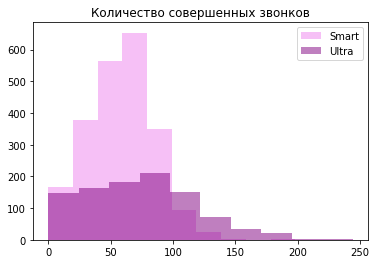

In [21]:
import matplotlib.pyplot as plt

plt.hist(united_data['calls_count'][united_data['tariff'] == 'smart'], alpha=0.5, color='violet')
plt.hist(united_data['calls_count'][united_data['tariff'] == 'ultra'], alpha=0.5, color='purple')
plt.title('Количество совершенных звонков')
plt.legend(['Smart', 'Ultra'])
plt.show()

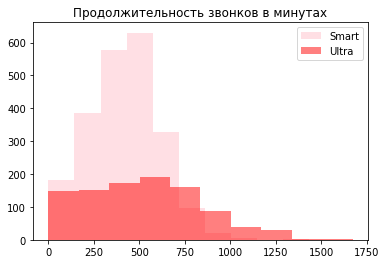

In [22]:
plt.hist(united_data['calls_duration'][united_data['tariff'] == 'smart'], alpha=0.5, color='pink')
plt.hist(united_data['calls_duration'][united_data['tariff'] == 'ultra'], alpha=0.5, color='red')
plt.title('Продолжительность звонков в минутах')
plt.legend(['Smart', 'Ultra'])
plt.show()

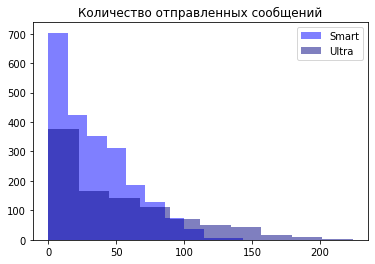

In [23]:
plt.hist(united_data['messages_count'][united_data['tariff'] == 'smart'], alpha=0.5, color='blue')
plt.hist(united_data['messages_count'][united_data['tariff'] == 'ultra'], alpha=0.5, color='navy')
plt.title('Количество отправленных сообщений')
plt.legend(['Smart', 'Ultra'])
plt.show()

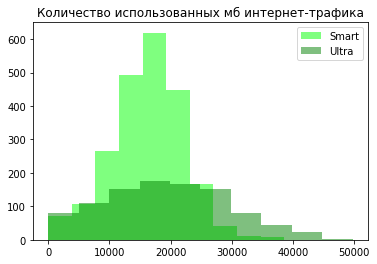

In [24]:
plt.hist(united_data['mb_traffic_count'][united_data['tariff'] == 'smart'], alpha=0.5, color='lime')
plt.hist(united_data['mb_traffic_count'][united_data['tariff'] == 'ultra'], alpha=0.5, color='green')
plt.title('Количество использованных мб интернет-трафика')
plt.legend(['Smart', 'Ultra'])
plt.show()

- Можем посмотреть на средние значения использованных услуг в каждом месяце отдельно:

In [25]:
mean_data = united_data.pivot_table(index=['month', 'tariff']\
, values=('calls_count','calls_duration', 'messages_count','mb_traffic_count')).astype(int).reset_index()

mean_data.head(10)

,month,tariff,calls_count,calls_duration,mb_traffic_count,messages_count
0,1514764800000000000,smart,27,203,8513,18
1,1514764800000000000,ultra,59,428,13140,33
2,1517443200000000000,smart,40,298,11596,24
3,1517443200000000000,ultra,41,297,11775,21
4,1519862400000000000,smart,54,390,15103,31
5,1519862400000000000,ultra,67,489,17535,32
6,1522540800000000000,smart,51,367,13461,30
7,1522540800000000000,ultra,64,458,16827,31
8,1525132800000000000,smart,55,387,15804,33
9,1525132800000000000,ultra,72,510,19362,37


И визуально сравнить эти средние значения:

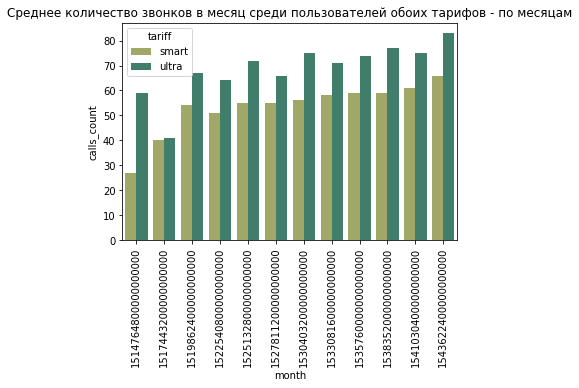

In [26]:
sns.barplot(x="month", y="calls_count", hue="tariff", data=mean_data, palette='gist_earth_r')\
.set_title('Среднее количество звонков в месяц среди пользователей обоих тарифов - по месяцам')
plt.xticks(rotation=90)
plt.show()

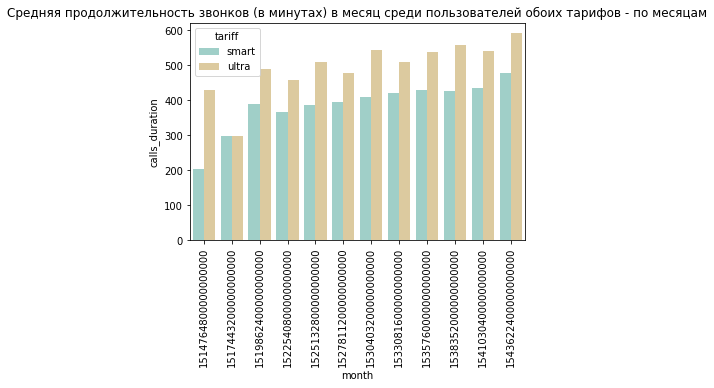

In [27]:
sns.barplot(x="month", y="calls_duration", hue="tariff", data=mean_data, palette='BrBG_r')\
.set_title('Средняя продолжительность звонков (в минутах) в месяц среди пользователей обоих тарифов - по месяцам')
plt.xticks(rotation=90)
plt.show()

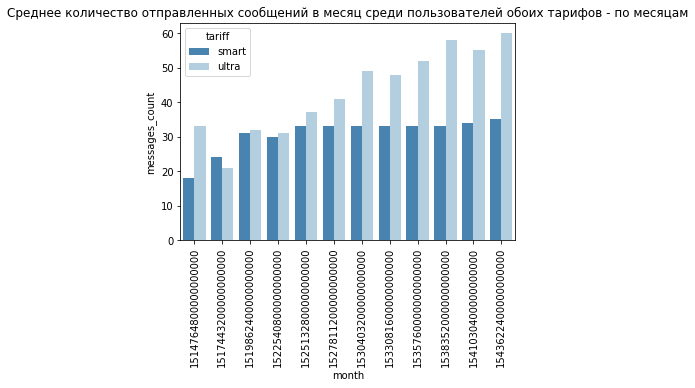

In [28]:
sns.barplot(x="month", y="messages_count", hue="tariff", data=mean_data, palette='Blues_r')\
.set_title('Среднее количество отправленных сообщений в месяц среди пользователей обоих тарифов - по месяцам')
plt.xticks(rotation=90)
plt.show()

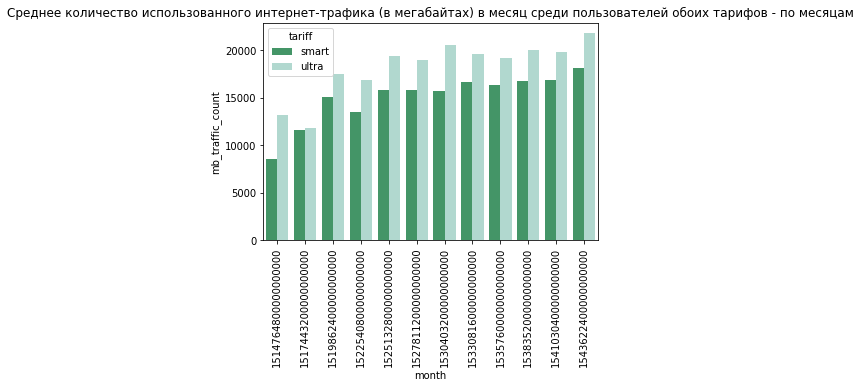

In [29]:
sns.barplot(x="month", y="mb_traffic_count", hue="tariff", data=mean_data, palette='BuGn_r')\
.set_title('Среднее количество использованного интернет-трафика (в мегабайтах) в месяц среди пользователей обоих тарифов - по месяцам')
plt.xticks(rotation=90)
plt.show()

Поскольку мы располагаем данными о том, расторгал пользователь договор или нет, можем посмотреть, связано ли это как-нибудь с тарифом.

In [30]:
churn_data = united_data[united_data['churn_date'].notnull()]
churn_data_ratio =  churn_data.groupby('tariff')['user_id'].agg(['count', lambda x: x.count()*100/len(churn_data)])
print('Общее количество пользователей, расторгнувших договор:', len(churn_data))
print('Тариф / количество пользователей, расторгнувших договор / % от общего количества расторгнувших:')
print(churn_data_ratio)

Общее количество пользователей, расторгнувших договор: 187
Тариф / количество пользователей, расторгнувших договор / % от общего количества расторгнувших:
        count  <lambda_0>
tariff                   
smart     111   59.358289
ultra      76   40.641711


Соотношение 60 на 40 - заметной разницы в выражении преданности компании "Мегалайн" среди пользователей обоих тарифов нет.

#### Промежуточный вывод о поведении пользователей:

Каждый месяц пользователи тарифа "Смарт" совершают от 0 до 133 (а в среднем - 58) звонков, суммарной продолжительностью от 0 до 987 (а в среднем - 417) минут. Аналогичные показатели у пользователей тарифа "Ультра" - это от 0 до 202 (а в среднем - 73) звонков, суммарной продолжительностью от 0 до 1477 (в среднем - 526) минут. Очевидно, вторые говорят по телефону чаще и дольше.

Текстовыми сообщениями абоненты "Ультры" тоже общаются больше: они отправляют от 0 до 190 (а в среднем - 49) смс каждый месяц,  против 0-117 (и в среднем - 33) смс абонентов "Смарта".

И наконец, потребление интернет-трафика: каждый месяц пользователи тарифов "Смарт" и "Ультра" расходуют по 0-34 (в среднем - 17) и 0-50 (в среднем - 20) гб соответственно. И здесь мы видим, что используемый абонентами "Ультры" объем услуг больше.

Проведем исследование о том, приносят ли пользователи при этом одинаковую среднюю выручку.
Сформулируем и проверим гипотезы.


### Шаг 4. Проверка гипотез <a id="hypotheses"></a> 

#### Гипотеза о равенстве средней выручки пользователей тарифов «Смарт» и «Ультра»

Предположим, что средняя выручка, приносимая пользователями обоих тарифов, равна. Это будет наша нулевая гипотеза. Альтернативной гипотезой в этом случае будет предположение, что тарифы приносят разную выручку. Возьмем из общей базы данных (нашей генеральной совокупности) две выборки - пользователей тарифа "Смарт" и пользователей тарифа "Ультра". Поскольку выборки независимы, используем метод st.ttest_ind. И поскольку выборки разного размера, и можно предполагать, что их дисперсии разные, укажем параметр equal_var = False. Критический уровень статистической значимости возьмем 0.01. Проведем тест, и если вероятность того, что средние этих выборок окажутся очень близко (или равны), будет меньше заявленного критического уровня значимости, отвергнем нулевую гипотезу, как неподтвержденную.

In [31]:
from scipy import stats as st

#выборки по тарифам
revenue_smart = united_data[united_data['tariff']=='smart']['revenue']
revenue_ultra = united_data[united_data['tariff']=='ultra']['revenue']

alpha = .01

results = st.ttest_ind(revenue_smart, revenue_ultra, equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 4.2606313931076085e-250
Отвергаем нулевую гипотезу


Как разбросаны значения доходов обеих выборок, можем увидеть на графике распределения:

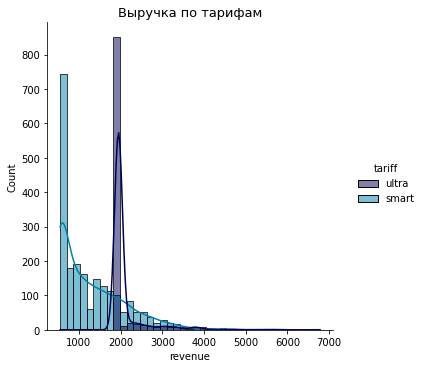

In [32]:
sns.displot(data=united_data, x='revenue', hue="tariff", palette='ocean', kde=True)
plt.title('Выручка по тарифам', fontsize=13)
plt.show()

Видим, что средние далеки друг от друга. И говорить о том, что пользователи тарифа «Смарт» приносят компании такой же доход, как пользователи тарифа «Ультра», мы не можем.

Если гипотеза о равенстве средней выручки не подтвердилась, можем проверить одностороннюю гипотезу о том, что, например, выручка от пользователей тарифа "Смарт" меньше.

Нулевая гипотеза (наша точка отправления) по-прежнему гласит: средние выручки равны.


Альтернативная гипотеза: средняя выручка "Смарта" значимо меньше средней выручки "Ультры".

In [33]:
alpha = .01 

results = st.ttest_1samp(
    revenue_smart, 
    revenue_ultra.mean())

print('p-значение:', results.pvalue / 2)

if (results.pvalue / 2 < alpha) and (revenue_smart.mean() < revenue_ultra.mean()):
    print("Отвергаем нулевую гипотезу, средняя выручка 'Смарта' значимо меньше средней выручки 'Ультры'")
else:
    print("Не отвергаем нулевую гипотезу")


p-значение: 1.681759983e-315
Отвергаем нулевую гипотезу, средняя выручка 'Смарта' значимо меньше средней выручки 'Ультры'


Вывод: гипотеза о равенстве средней выручки пользователей тарифов «Смарт» и «Ультра» не подтвердилась и была отвергнута. Есть основания предполагать, что тариф "Смарт", в среднем, приносит меньше денег.

#### Гипотеза о равенстве средней выручки пользователей из Москвы и выручки пользователей из других регионов

Аналогичным образом сопоставим выручку от жителей столицы и других городов.

Нулевой, тестируемой гипотезой будет то, что средняя выручка обеих выборок будет равна. Альтернативной гипотезой - что средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов. Если уровень значимости вероятности нулевой гипотезы будет выше заданного критического уровня, у нас будут основания не отвергать ее.

И корректирую выборки:

In [34]:
#выборки по Москве и регионам
revenue_msk = united_data[united_data['city']== 'Москва']['revenue']
revenue_region = united_data[united_data['city']!= 'Москва']['revenue']

alpha = .01

results = st.ttest_ind(revenue_msk, revenue_region, equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.5257376663729298
Не получилось отвергнуть нулевую гипотезу


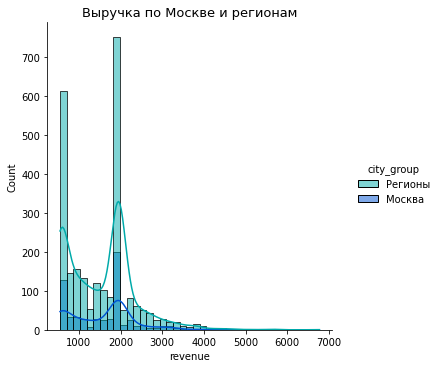

In [35]:
def city_group(city):
    if city=='Москва':
        return 'Москва'
    return 'Регионы'
united_data['city_group'] = united_data['city'].apply(city_group)
#для упрощения отрисовывания графика провела категоризацию по городам

sns.displot(data=united_data, x='revenue', hue='city_group', palette='winter_r', kde=True)
plt.title('Выручка по Москве и регионам', fontsize=13)
plt.show()

Распределения очень близки.

Вывод: можно предполагать, что для доходов компании место жительства пользователей значения не имеет: подтверждений тому, 
что средняя выручка от жителей столицы отличается от средней выручки от жителей регионов, нет.

### Шаг 5. Общий вывод <a id="conclusion"></a> 

Проект был посвящен анализу поведения абонентов оператора сотовой связи, использующих два предложенных тарифа. Целью проекта было понять, какой тариф приносит больше денег.

В качестве данных были предоставлены несколько таблиц:
•	Таблица users (информация о пользователях),
•	Таблица calls (информация о звонках),
•	Таблица messages (информация о сообщениях),
•	Таблица internet (информация об интернет-сессиях),
•	Таблица tariffs (информация о тарифах).

Знакомство с таблицами и изучение данных в них показало, что ошибок, аномалий, пропусков нет, и связь между ними может быть установлена по идентификатору пользователя. Это позволило обойтись минимальной предобработкой и быстро собрать все данные в одну объединенную таблицу пользователей.

Также данных было достаточно, чтобы рассчитать объемы потребленных услуг, затраченные на превышенный лимит деньги и общую выручку компании в каждом месяце от каждого пользователя.

При сравнительном анализе данных было установлено, что абоненты тарифа "Ультра" тратят больше минут разговора, сообщений и гб интернет-трафика каждый месяц, чем абоненты "Смарта". Однако, если судить о средних значениях, обе выборки пользователей в большинстве своем придерживаются заданных тарифами лимитов. Как следствие, "приносят" компании только абонентскую плату.

Тут нелишним будет вспомнить, что ежемесячная плата по тарифу "Ультра" почти в четыре раза превосходит плату по тарифу "Смарт".
Но мы все же решили проверить гипотезу о том, что обе выборки могут приносить одинаковую выручку.

Результат t-теста двух независимых выборок показал, что заявленная гипотеза не подтвердилась. Более того, дополнительное тестирование показало, что средняя выручка 'Смарта' статистически значимо меньше средней выручки 'Ультры'.

Наконец, предположение о том, что доходность от московских пользователей отличается от доходности пользователей других городов, не подтвердилось. Похоже, в среднем, пользователи по всей стране ведут себя одинаково.

В связи с вышеизложенным, можно рекомендовать маркетологам компании делать упор не на географии и акцентированной работе с конкретными регионами, а на продвижении тарифа "Ультра".